<a href="https://colab.research.google.com/github/motahugo/An-lises-com-Pandas-Python/blob/main/An%C3%A1lise_Cliente_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
vendas = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/varejo.xlsx")


In [3]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [6]:
vendas["idcanalvenda"] =  vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [7]:
vendas["Nome_Departamento"] =  vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [8]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [9]:
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [10]:
vendas[vendas["Preço"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [11]:
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [12]:
media_preco = vendas["Preço"].mean()
media_preco

906.5891285439033

In [13]:
vendas["Preço"].fillna(media_preco, inplace=True)
vendas.query('estado == "MS"')


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,906.589129,879.200,Telefones_e_Celulares,MS,5804
284,346055,Internet,A,2023-03-23,906.589129,87.648,Ar_e_Ventilacao,MS,16359
402,172555,Mobile,A,2023-03-19,906.589129,135.840,Ar_e_Ventilacao,MS,13691
411,446380,Mobile,A,2023-03-09,906.589129,1703.120,Eletrodomesticos,MS,13024
770,40425,Mobile,B,2023-04-21,906.589129,1759.200,Telefones_e_Celulares,MS,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,906.589129,339.912,Eletroportateis,MS,20873
78718,320895,Mobile,B,2023-01-20,906.589129,1000.800,Telefones_e_Celulares,MS,17772
79465,389240,Aplicativo,A,2023-01-14,906.589129,279.200,Eletrodomesticos,MS,20399
79548,124585,Mobile,A,2023-04-21,906.589129,2051.240,TVs_e_Acessorios,MS,17784


In [14]:
vendas.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,80228.000000,80228.000000,80228.000000,80228.000000
mean,251001.882448,906.589129,908.619823,13935.464676
std,144272.920296,1057.611490,1057.583101,8065.215581
min,0.000000,6.320000,6.320000,1.000000
25%,126835.000000,147.920000,150.706000,6920.750000
50%,251760.000000,532.448000,535.120000,13938.000000
75%,375925.000000,1199.200000,1215.240000,20918.000000
max,723410.000000,14439.240000,14439.240000,27982.000000


In [15]:
vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [20]:
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-20-7c8346fa716f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


**Faturamento por Departamento**

✅



In [17]:
vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("sum")

Nome_Departamento
Acessorios_e_Inovacoes     286649.376
Alimentos                     208.472
Ar_e_Ventilacao            175871.408
Audio                      179649.360
Automotivo                 312840.784
Bebes                      582240.792
Beleza_e_Saude             126641.920
Brinquedos                 121043.248
Cama,_Mesa_e_Banho          14959.832
Casa_e_Construcao           25144.608
Cine_e_Foto                 14809.584
Decoracao                   18351.024
Eletrodomesticos          5986431.936
Eletroportateis            503252.248
Esporte_e_Lazer            502043.304
Ferramentas                 62665.744
Games                      188579.072
Informatica                613378.264
Instrumentos_Musicais         834.608
Linha_Industrial            18243.960
Malas_e_Mochilas            17677.560
Moda                          141.024
Moveis                    1110726.760
Perfumaria                  45554.744
Pet_Shop                     9490.216
Produtos_de_Limpeza         3590

In [18]:
cliente = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [19]:
vendas_cliente = vendas_correto.merge(cliente, how="left" ,on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596


In [28]:
media_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").reset_index(),2)
media_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Internet,8211.84
2,Mobile,8222.72


In [31]:
import matplotlib.pyplot as plt

<Axes: xlabel='idcanalvenda', ylabel='renda'>

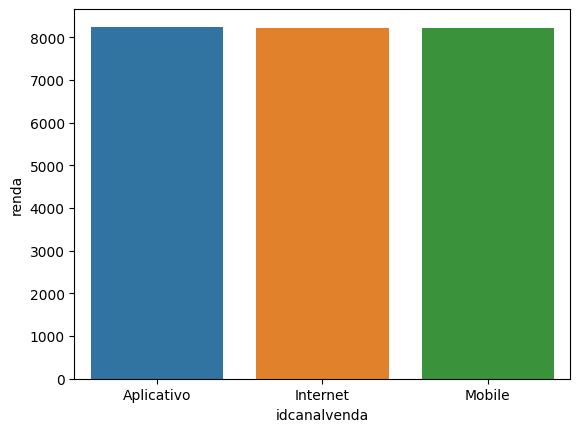

In [32]:
sns.barplot(x="idcanalvenda", y="renda", data= media_renda)

In [47]:
total_estado = vendas_cliente.groupby("estado").idcompra.nunique().sort_values(ascending=False).reset_index()
total_estado

,estado,idcompra
0,SP,7912
1,RJ,4746
2,MG,2930
3,RS,1113
4,PR,780
5,BA,574
6,SC,573
7,DF,523
8,GO,439
9,PE,438


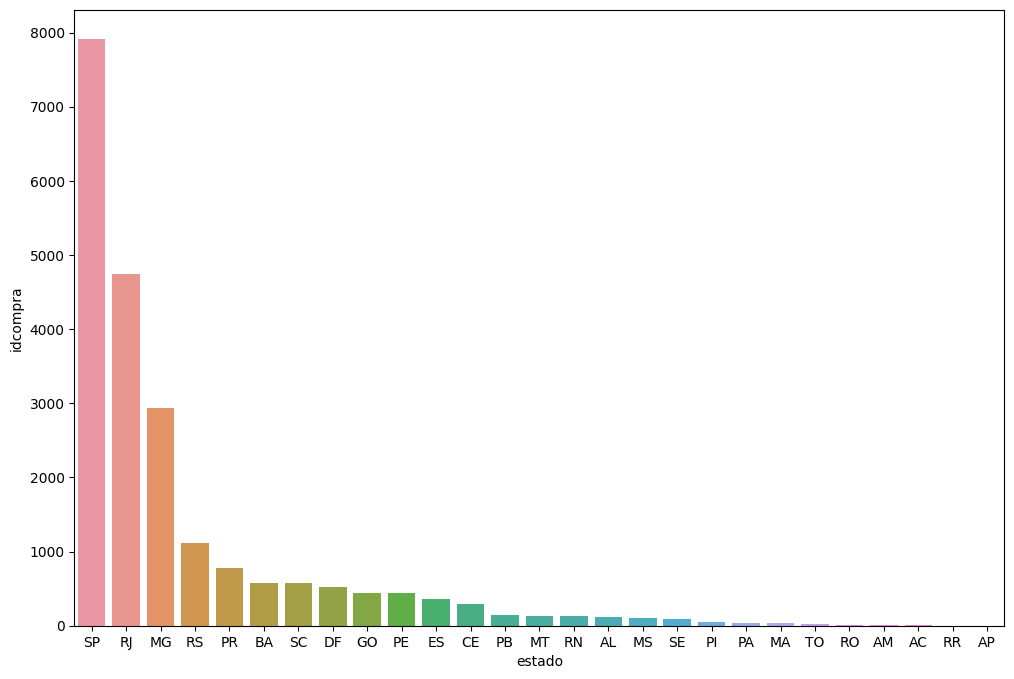

In [51]:
grafico = sns.barplot(x="estado", y="idcompra", data= total_estado)
grafico.figure.set_size_inches(12, 8)

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio


In [56]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [61]:
px.bar(total_estado, x="estado", y="idcompra")

In [62]:
px.bar(media_renda, x="idcanalvenda", y="renda")